In [1]:
import os
import sys

basePath = '..'

module_path = os.path.abspath(os.path.join(basePath))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from typing import List
import numpy as np
from TP5.autoencoder_utils import to_bits, labeled_scatter, print_bit_array, generate
from TP5.fonts import font2, font2_lables, font1, font1_lables, font3_lables, font3
from TP5.MLP import Network

In [3]:
training_points = to_bits(font3)

layers: List[int] = [25,15,5, 2, 5,15,25]
layers.append(np.size(training_points, axis=1))
layers.insert(0, np.size(training_points, axis=1))

epoch = 5000
eta = 0.0005

neural_network: Network = Network(np.size(training_points, 1), layers, np.size(training_points, 1), 1e-6)

In [4]:
count = 35
start = 0
training_points = training_values = to_bits(font3)[start:start+count]

Loss: 0.24688954624385182 at epoch 500
Loss: 0.15490664560921652 at epoch 1000
Loss: 0.08850576038212622 at epoch 1500
Loss: 0.08557258397330371 at epoch 2000
Loss: 0.03099042791887368 at epoch 2500
Loss: 0.023720022919856545 at epoch 3000
Loss: 0.018099208253183875 at epoch 3500
Loss: 0.014957912825054126 at epoch 4000
Loss: 0.01278306793083484 at epoch 4500
Loss: 0.011232087588836287 at epoch 5000
Minimum loss:  0.011232087588836287


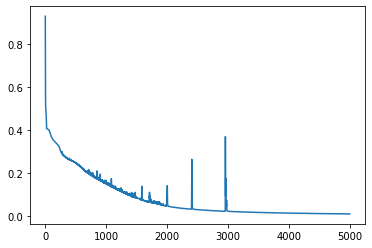

In [5]:
neural_network.train(training_points, training_values, epoch, eta,5, 0.5,10, 0.1, True)

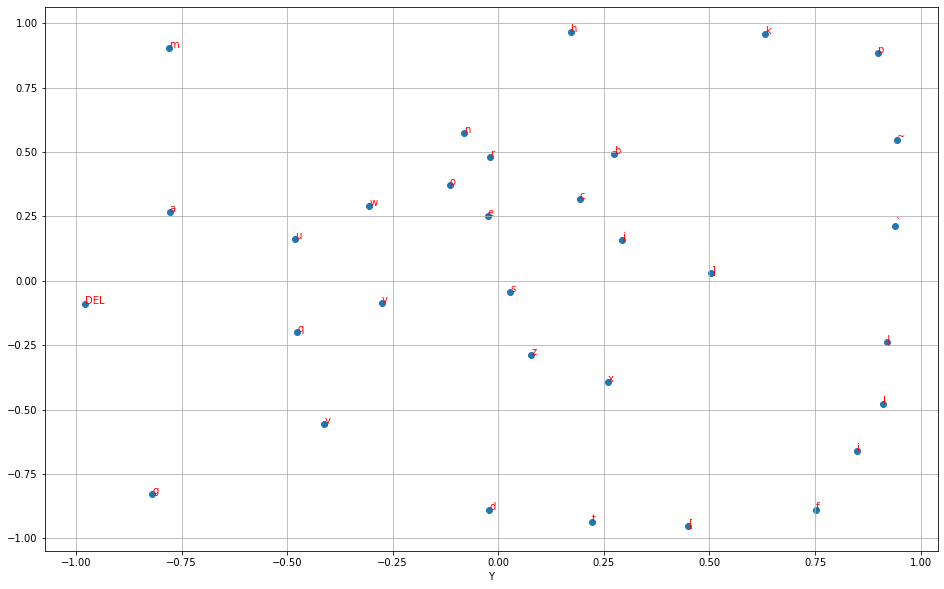

In [6]:
z_values: np.ndarray = np.empty((np.size(training_points, 0), 2))
predictions: np.ndarray = np.empty(training_points.shape)

for i in range(np.size(training_points, 0)):
    predictions[i], w = neural_network.predict(training_points[i])
    z_values[i] = neural_network.activations[len(layers)//2 + 1]

labeled_scatter(z_values[:, 0], z_values[:, 1], labels=font3_lables[start:start+count])

In [12]:
for i in range(len(predictions)):
    if not (predictions[i] * training_points[i] >= 0).all():
        print_bit_array(predictions[i])
        print_bit_array(training_points[i])
        print('\n\n')

In [8]:
fv = 19
sv = 26
print_bit_array(training_values[fv])
print_bit_array(training_values[sv])

     
     
 ****
*    
 *** 
    *
**** 
     
     
*****
   * 
  *  
 *   
*****


In [9]:
generate(neural_network, z_values, fv, sv, 10)

[ 0.02803089 -0.04247718]
     
     
 ****
*    
 *** 
    *
**** 
[ 0.03361589 -0.06980049]
     
     
 ****
*    
 *** 
    *
**** 
[ 0.03920089 -0.09712379]
     
     
 ****
*    
 *** 
    *
**** 
[ 0.04478589 -0.1244471 ]
     
     
 ****
*    
 *** 
    *
**** 
[ 0.05037089 -0.15177041]
     
     
 ****
   * 
  ** 
    *
**** 
[ 0.05595589 -0.17909371]
     
     
*****
   * 
  ** 
     
**** 
[ 0.06154089 -0.20641702]
     
     
*****
   * 
  *  
 *   
**** 
[ 0.06712589 -0.23374033]
     
     
*****
   * 
  *  
 *   
*****
[ 0.07271089 -0.26106363]
     
     
*****
   * 
  *  
 *   
*****
[ 0.07829589 -0.28838694]
     
     
*****
   * 
  *  
 *   
*****
